## Imports

In [1]:
from PIL import Image, ImageFont, ImageDraw

import matplotlib.pyplot as plt
import random
import os
import csv
import json
import cv2
import numpy as np

In [2]:
## set default paths
font_path = "fonts"
background = "ita_passport_bg.png"
output_path = "out"
path_backgrounds = 'backgrounds'
list_backgrouns = os.listdir(path_backgrounds)
background_chosen = list_backgrouns[random.randint(0, len(list_backgrouns)-1)]
font_styles = os.listdir(font_path)
print(font_styles)
data_file = open("data/for_testing.csv", "r", newline='')

['Hack-Italic.ttf', 'Hack-Regular.ttf', 'Hack-Bold.ttf', 'Hack-BoldItalic.ttf']


In [3]:
## preparing path
font_style = os.path.join(font_path, font_styles[2])

#loading font
font_size = 12
font = ImageFont.truetype(font_style, font_size)
char_width = 7

## color and coordinates definition
color = (0,0,0) #black

csv_reader = csv.reader(data_file)

written_passports = 0
pos_dict_list = []

['BARRACO', 'MARIO SALVATORE', 'ITALIANA', '8/11/1904', 'M', '6/13/2016', '6/13/2026', 'MILANO']
[2, 0]
64
[62, 21, 46]
[]


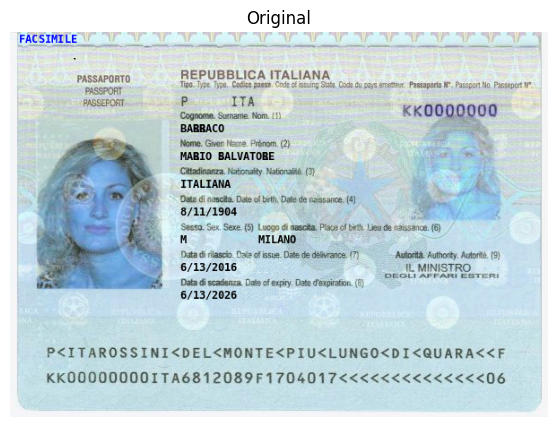

rotation


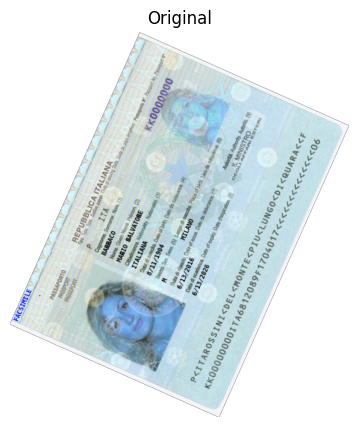

ValueError: could not broadcast input array from shape (723,636,4) into shape (723,636,3)

In [4]:
for passport_data in csv_reader:
    print(passport_data)

    image = Image.open(background)
    
    draw = ImageDraw.Draw(image)

    color_facsimile = (255, 0, 0)
    draw.text((10,0), "FACSIMILE    ", color_facsimile, font = font)

    # random number: forged_rnd = 0 => elementi spuri nel passaporto ("passaporto sporco")
    #                forged_rnd = 1 => colore diverso della scritta                
    #                forged_rnd = 2 => lettere scritte una sopra l'altra
    #                forged_rnd = 3 => caratteri in linee sfalsate   

    forged_rnd = [random.randint(0,3),random.randint(0,3)]
    print(forged_rnd)
    
    # n randomico caratteri "falsi"
    length_tot = 0
    for i in range(len(passport_data)):
        length_tot += len(passport_data[i])
    print(length_tot)
    # poniamo che ci siano massimo 5 caratteri falsi per passaporto
    # num_false_chars indicates how many wrong characters will show up in the forged passport
    num_false_chars = random.randint(1, 5)
    false_char_indexes = []
    for i in range(0, num_false_chars):
        false_char_indexes.append(random.randint(0, length_tot - 1))
    print(false_char_indexes)
    # numero di caratteri di cui cambiare il colore
    num_diff_color_chars = random.randint(1, 5)
    diff_color_char_indexes = []
    if 1 in forged_rnd:
        for i in range(0, num_diff_color_chars):
            diff_color_char_indexes.append(random.randint(0, length_tot - 1))
    print(diff_color_char_indexes)
           
    file_name = "forged_passport_" + str(written_passports) + ".png"
    current_char = 0
    for i in range(len(passport_data)):
        for j in range(len(passport_data[i])):
                substitution_B = [True if passport_data[i][j]=='S' or passport_data[i][j]=='P' or passport_data[i][j]=='R' else False]
                #substitution_D = [True if current_char=='C' or current_char=='G' else False]
                #substitution_M = [True if current_char=='N' or current_char=='H' else False]    
                if current_char in false_char_indexes and 3 in forged_rnd:
                    c_fontstyle = font_style # it's here if we want it to dinamically change one day
                    c_fontsize = font_size + random.randint(-2, 2)
                    c_font = ImageFont.truetype(c_fontstyle, c_fontsize)
                    if i == 7:
                        coord_string = (190 + 87 + j * char_width + random.randint(-2,2), 100 + 31 * 4 + random.randint(-2,2))
                    else:
                        coord_string = (190 + j * char_width + random.randint(-2,2), 100 + 31 * i + random.randint(-2,2))
                    # colore diverso
                    if current_char in diff_color_char_indexes:
                        diff_color = (20,20,20) # valore più vicino al nero che ci sia
                        draw.text(coord_string, passport_data[i][j], diff_color, font = c_font)
                    # sovrascittura lettera
                    elif passport_data[i][j]=='S' or passport_data[i][j]=='P' or passport_data[i][j]=='R' and 2 in forged_rnd:
                        draw.text(coord_string, passport_data[i][j], color, font = c_font)
                        draw.text(coord_string, 'B', color, font = c_font)
                    else:
                        draw.text(coord_string, passport_data[i][j], color, font = c_font)
                    #pos = draw.textbbox(coord_string,  passport_data[i][j], font = c_font) #(left, top, right, bottom) bounding box
                    #draw.rectangle(pos, outline = 'blue')
                    #pos_dict_list.append({'path':file_name, 'bbox':pos})
                else:
                    if i == 7:
                        coord_string = (190 + 87 + j * char_width, 100 + 31 * 4)
                    else:
                        coord_string = (190 + j * char_width, 100 + 31 * i)
                    # colore diverso
                    if current_char in diff_color_char_indexes:
                        diff_color = (20,20,20) # valore più vicino al nero che ci sia
                        draw.text(coord_string, passport_data[i][j], diff_color, font = font)
                        #pos = draw.textbbox(coord_string,  passport_data[i][j], font = font) #(left, top, right, bottom) bounding box
                        #draw.rectangle(pos, outline = 'blue')
                        #pos_dict_list.append({'path':file_name, 'bbox':pos})
                    # sovrascrittura lettera
                    elif passport_data[i][j]=='S' or passport_data[i][j]=='P' or passport_data[i][j]=='R' and 2 in forged_rnd:
                        draw.text(coord_string, passport_data[i][j], color, font = font)
                        draw.text(coord_string, 'B', color, font = font)
                        #pos = draw.textbbox(coord_string,  passport_data[i][j], font = font) #(left, top, right, bottom) bounding box
                        #draw.rectangle(pos, outline = 'blue')
                        #pos_dict_list.append({'path':file_name, 'bbox':pos})
                    else:
                        draw.text(coord_string, passport_data[i][j], color, font = font)
                current_char += 1
    # se devo inserire dei valori spuri, ne inserisco un numero randomico compreso tra 1 e 30
    if 0 in forged_rnd:
        for i in range(random.randint(1,30)):
            coord_rnd_1 = (random.randint(0,600), random.randint(0,430))
            coord_rnd_2 = (coord_rnd_1[0]+1, coord_rnd_1[1]+1)
            draw.polygon([coord_rnd_1, coord_rnd_2], fill='black', outline='black')
            #pos = draw.textbbox(coord_rnd_1, '') #(left, top, right, bottom) bounding box
            #draw.rectangle(pos, outline = 'blue')
            #pos_dict_list.append({'path':file_name, 'bbox':pos})

    image.save(os.path.join(output_path, file_name), quality=100)
    image = cv2.imread(os.path.join(output_path, file_name), cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
    fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
    ax.imshow(image)
    ax.set_title('Original')
    ax.axis('off')
    plt.show()

    rnd_tec = ["rotation", "shearing"]
    technique = rnd_tec[random.randint(0,1)]
    print(technique)
    if technique == "rotation":
        angle = random.randint(1,90)
        
        # grab the dimensions of the image and then determine the
        # centre
        (h, w) = image.shape[:2]
        (cX, cY) = (w // 2, h // 2)

        # grab the rotation matrix (applying the negative of the
        # angle to rotate clockwise), then grab the sine and cosine
        # (i.e., the rotation components of the matrix)
        M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])

        # compute the new bounding dimensions of the image
        nW = int((h * sin) + (w * cos))
        nH = int((h * cos) + (w * sin))

        # adjust the rotation matrix to take into account translation
        M[0, 2] += (nW / 2) - cX
        M[1, 2] += (nH / 2) - cY

        # perform the actual rotation and return the image
        image = cv2.warpAffine(image, M, (nW, nH))

    elif technique == "shearing":
        shear_factor = 0.1
        shear_factor = random.uniform(shear_factor,0.2)

        w,h = image.shape[1], image.shape[0]
        M = np.array([[1, abs(shear_factor), 0],[0,1,0]])

        nW =  image.shape[1] + abs(shear_factor*image.shape[0])
        image = cv2.warpAffine(image, M, (int(nW), image.shape[0]), borderValue=(0,0,0,0))

        image = cv2.resize(image, (w,h))
        scale_factor_x = nW / w

        
    file_name = "forged_passport_" + str(written_passports) + "_" + technique + ".png"
    cv2.imwrite(os.path.join(output_path, file_name), image)
    image = cv2.imread(os.path.join(output_path, file_name), cv2.IMREAD_UNCHANGED)
    fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
    ax.imshow(image)
    ax.set_title('Original')
    ax.axis('off')
    plt.show()

#    l_img = cv2.imread(os.path.join(path_backgrounds, background_chosen))
#    x_offset=y_offset=50
#    s_img = cv2.imread(os.path.join(output_path, file_name), cv2.IMREAD_UNCHANGED)
#    l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
    # First create the image with alpha channel

#    s_img = cv2.cvtColor(s_img, cv2.COLOR_RGB2RGBA)

#    y1, y2 = y_offset, y_offset + s_img.shape[0]
#    x1, x2 = x_offset, x_offset + s_img.shape[1]

#    print("Min Alpha:", s_img[:, :, 3].min())
#    print("Max Alpha:", s_img[:, :, 3].max())

#    alpha_s = s_img[:, :, 3] / 255.0
#    alpha_l = 1.0 - alpha_s

#    for c in range(0, 3):
        #l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] + alpha_l * l_img[y1:y2, x1:x2, c])
#        overlay_area = l_img[y1:y2, x1:x2, c]
#        overlay_area_alpha = alpha_s * s_img[:, :, c] + alpha_l * overlay_area
        
        # Imposta la trasparenza a 0 dove il canale alpha dell'immagine sovrapposta è 0 (bordi neri)
#        overlay_area_alpha[s_img[:, :, 3] == 0] = 0
        
#        l_img[y1:y2, x1:x2, c] = overlay_area_alpha
#    cv2.imwrite("result.jpg", l_img)
#    image = cv2.imread("result.jpg", cv2.IMREAD_UNCHANGED)
#    fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
#    ax.imshow(image)
#    ax.set_title('Original')
#    ax.axis('off')
#    plt.show()


    written_passports += 1
    #with open(os.path.join(output_path, "annotation.json"),"w") as f :
    #    json.dump(pos_dict_list, f)